### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

* survival----Survival	0 = No, 1 = Yes
* pclass------Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex---------Sex	
* Age---------Age in years	
* sibsp-------# of siblings / spouses aboard the Titanic	
* parch-------# of parents / children aboard the Titanic	
* ticket------Ticket number	
* fare--------Passenger fare	
* cabin-------Cabin number	
* embarke-----Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[10,5]

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape,test.shape

((891, 12), (418, 11))

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Road Map
* Univariate analysis
* Bivariate analysis -  Here we try o find the pattern with the target variable
* Missing values
* Outlier identification
* Feature Engineering
* Scaling and Transformation

**Model Building**
* Base model - You must have your base model. In Classification the base model is 0 and in the regression is , its average
* Logistic Regression Model followed by tree Based Models

Note : All the  Models are submitted using KFold cross Validation Approach
* Parameter Tuning should be done for Top 3 Models only . Once that is done we wil bulid a Stacking Model(Ensemble Model)

Exceptions: LightGBM, CatBoost, ExtraTreesClassifer -- deep learning model.....


In [9]:
combined = pd.concat([train,test],ignore_index  =True)

In [10]:
# Univariate Analysis

num_cols = combined.select_dtypes(exclude='O').columns

In [11]:
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
cat_cols = combined.select_dtypes(include='O').columns
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [13]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [14]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

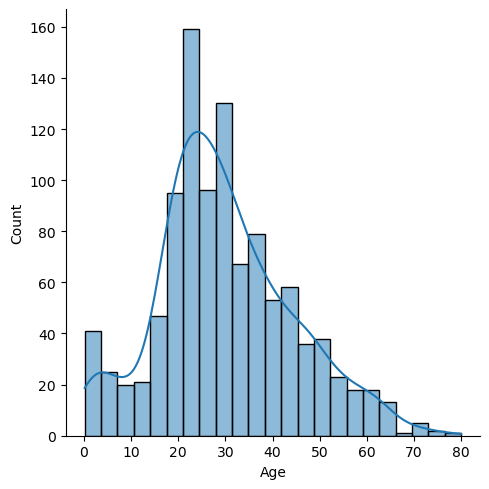

In [15]:
# Displot for age
sns.displot(combined.Age.dropna(),kde=True)
plt.show()

##### Age is skewed meaning the there were lot of people above 30

In [16]:
combined.Age.describe()  

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

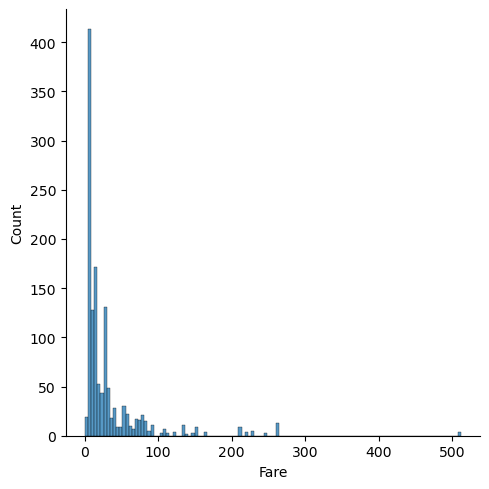

In [17]:
# Plot for fare

sns.displot(combined.Fare.dropna())   
plt.show()

##### Fare is highly skewed

In [18]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


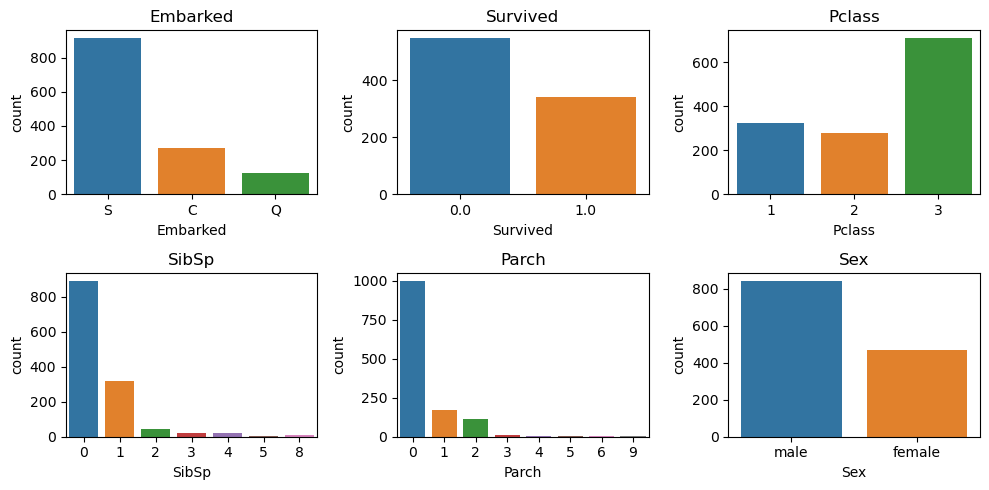

In [19]:
cols = ['Embarked','Survived','Pclass','SibSp','Parch','Sex']

nr = 2
nc = 3
ite = 1
for i in cols:
    plt.subplot(nr,nc,ite)
    sns.countplot(combined.loc[:,i])
    plt.title(i)
    ite+=1
plt.tight_layout()
plt.show()

* Most of the people who embarked from southhampton is mostly males, 
* were class 3 passengers and travelled alone did not survive

### base Model all died

In [20]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':0})

In [21]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [22]:
cd

C:\Users\R.SUGANESH


In [23]:
submission.to_csv('basemodel.csv',index = False)

### All females survived

In [24]:
my_dict = {'male':0,'female':1}

In [25]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':test.Sex.map(my_dict)})

In [26]:
submission.to_csv('allfemales.csv',index = False)

### Bivariate analysis
* Num vs Cat(target)

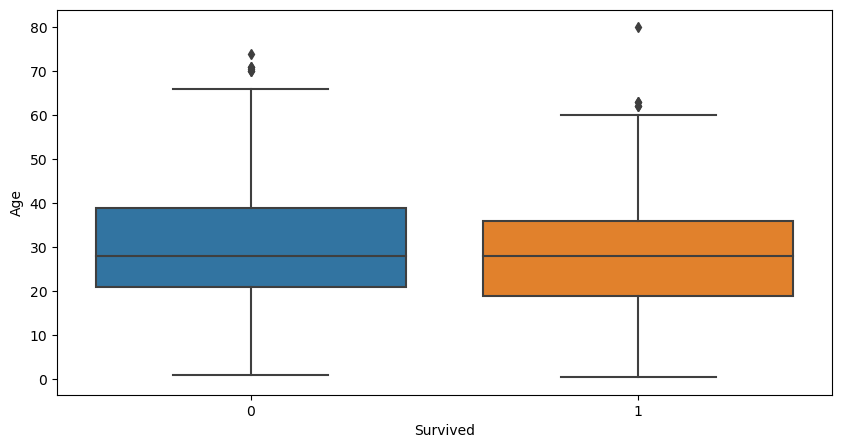

In [27]:
# Age vs Survived

sns.boxplot(x = 'Survived',y='Age',data = train)
plt.show()

* Oulier A man with 80 yrs age survived
* The more number of younger people have survived

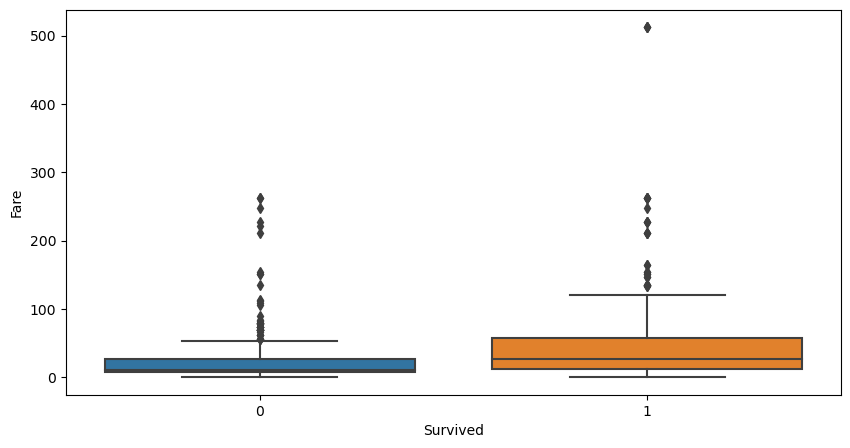

In [28]:
# Fare vs Survived
sns.boxplot(x = 'Survived',y='Fare',data = train)
plt.show()

* The people who survived paid more fair survived more

In [29]:
# Statiscal Summary
train.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


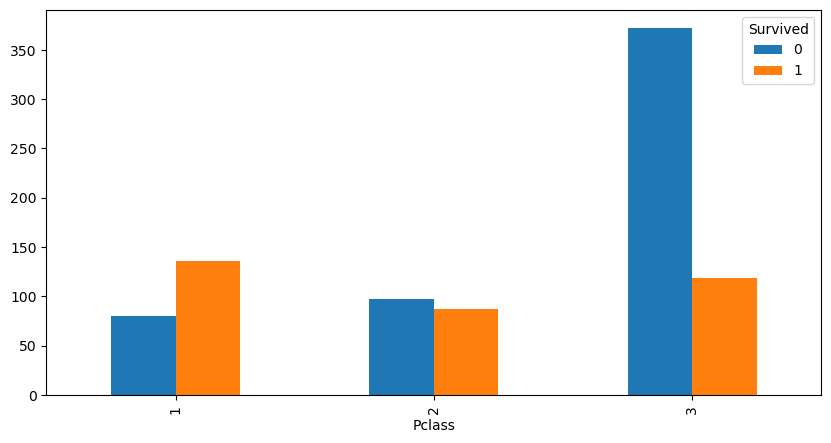

In [30]:
# Cat vs Cat
# Pclass vs Survived

pd.crosstab(train.Pclass,train.Survived).plot(kind = 'bar')
plt.show()

In [31]:
pd.crosstab(train.Pclass,train.Survived,normalize=True,margins=True)*100

Survived,0,1,All
Pclass,,,
1,8.978676,15.263749,24.242424
2,10.886644,9.764310,20.650954
3,41.750842,13.355780,55.106622
All,61.616162,38.383838,100.000000


* Class 1,2 has high survival choice
* Class 3 not have high survival rate

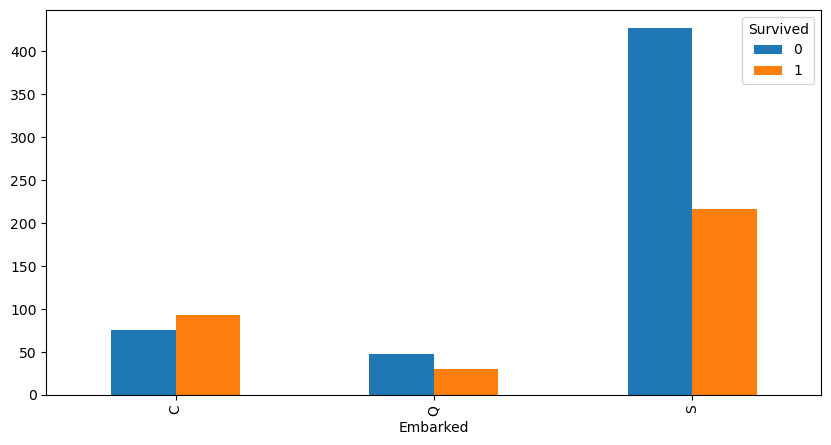

In [32]:
# Embarked vs Survived

pd.crosstab(train.Embarked,train.Survived).plot(kind = 'bar')
plt.show()

* Cherberg and then Southampton people have higher survival percantage

In [33]:
pd.crosstab(train.Embarked,train.Survived,normalize=True,margins=True)*100

Survived,0,1,All
Embarked,,,
C,8.436445,10.461192,18.897638
Q,5.286839,3.374578,8.661417
S,48.031496,24.409449,72.440945
All,61.754781,38.245219,100.000000


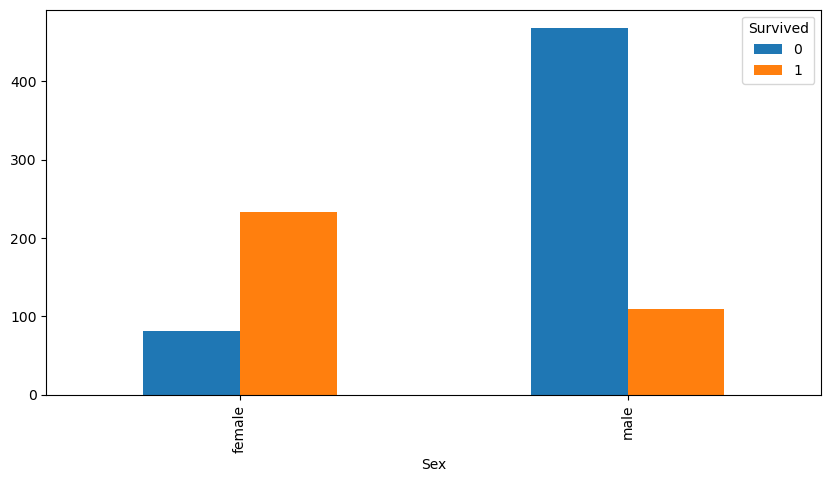

In [34]:
# Sex vs Survived

pd.crosstab(train.Sex,train.Survived).plot(kind = 'bar')
plt.show()

* High survival rate for females comparison to males

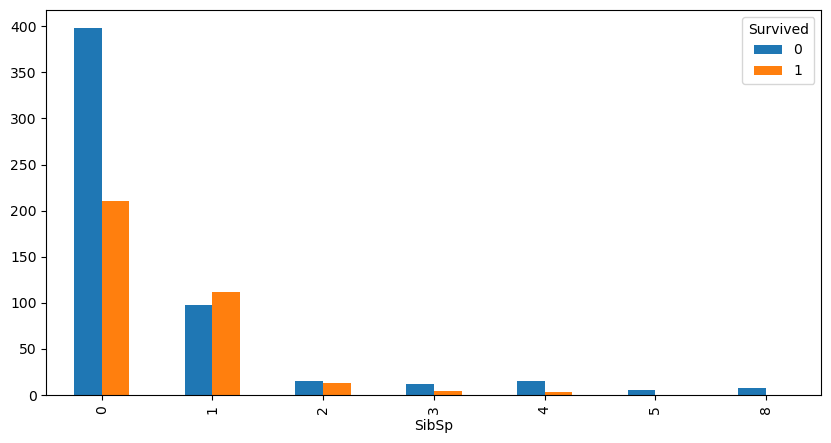

In [35]:
# SibSp vs Survived

pd.crosstab(train.SibSp,train.Survived).plot(kind = 'bar')
plt.show()  
# Inf : Solo travllers & couples have higher chances of survival

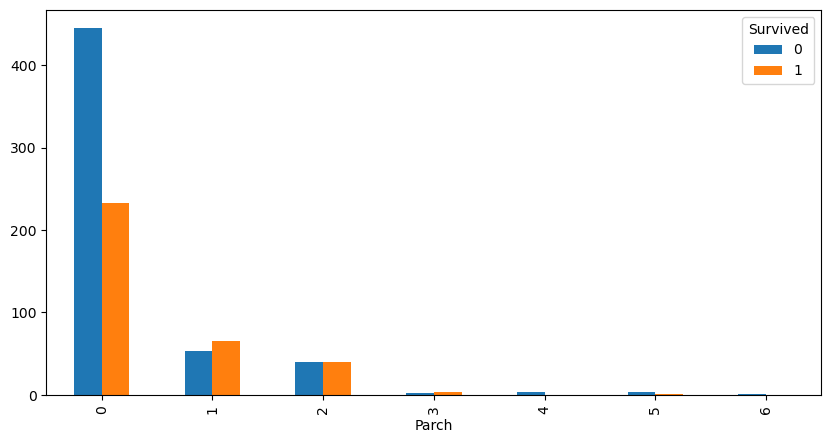

In [36]:
# Parch vs Survived

pd.crosstab(train.Parch,train.Survived).plot(kind = 'bar')
plt.show() # Inf : Solo travllers & family of 1 and two have high chances of survival

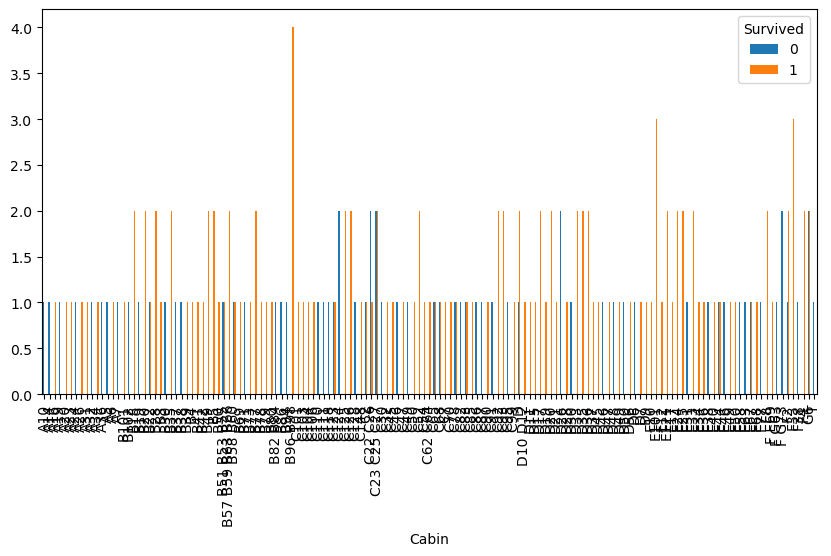

In [37]:
# Cabin vs Survived

pd.crosstab(train.Cabin,train.Survived).plot(kind = 'bar')
plt.show()

#### People with class 1 , cming from cherbourg and southhampton, paid fare more than 26 dollars, female, solo traveller, or with 1 person with an age of 30 or more have high likelihood of survival

In [38]:
# Missing Values
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### Feature Engineering

* Cabin

In [39]:
# Cabin
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [40]:
cabins = ['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [41]:
def cabin_available(x):
    if x in cabins:
        return('Avail')
    else:
        return('Not avail')

In [42]:
combined['Cabin_cat'] = combined.Cabin.apply(cabin_available)

In [43]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not avail
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Avail
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Not avail
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Avail
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not avail


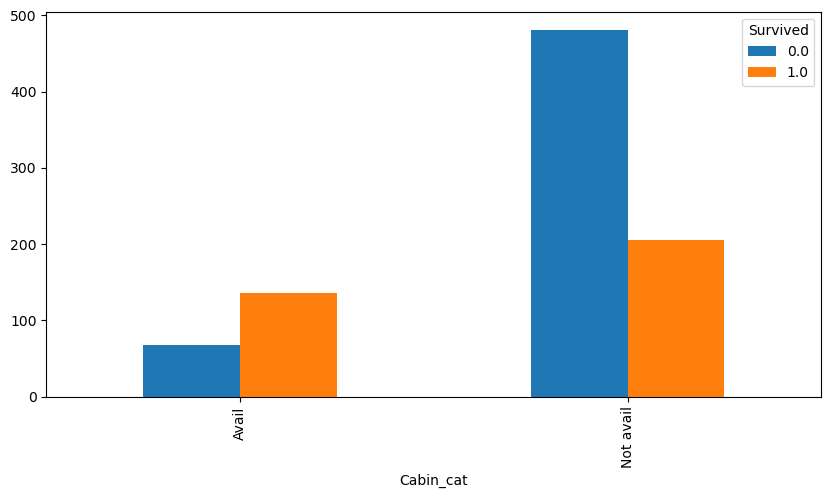

In [44]:
pd.crosstab(combined.Cabin_cat,combined.Survived).plot(kind= 'bar')
plt.show()

* People who  have cabins survived more
* People who dont have cabins survived less

In [45]:
# Age
combined[combined.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_cat
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Not avail
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Not avail
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Not avail
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Not avail
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Not avail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Not avail
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,Not avail
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Not avail
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Not avail


In [46]:
#name extract the salutation
combined.Name.str.split(', ',expand=True)[1].str.split('.',expand=True)

,0,1,2
0,Mr,Owen Harris,None
1,Mrs,John Bradley (Florence Briggs Thayer),None
2,Miss,Laina,None
3,Mrs,Jacques Heath (Lily May Peel),None
4,Mr,William Henry,None
...,...,...,...
1304,Mr,Woolf,None
1305,Dona,Fermina,None
1306,Mr,Simon Sivertsen,None
1307,Mr,Frederick,None


In [47]:
f_names = combined.Name.str.split(', ',expand=True)[1]

In [48]:
combined['titles'] = f_names.str.split('.',expand=True)[0]

In [49]:
combined.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_cat,titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not avail,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Avail,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Not avail,Miss


In [50]:
# fetching my titles and replacing all the titles other than  Mr', ' Mrs', ' Miss', ' Master',' Ms' with others

In [51]:
combined.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [52]:
titles_ignore = ['Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona' ]

In [53]:
def mytiltes(x):
    if x in titles_ignore:
        return('others')
    else:
        return(x)

In [54]:
combined.titles = combined.titles.apply(mytiltes)

In [55]:
combined.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'others', 'Ms'], dtype=object)

In [56]:
combined.groupby('titles')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
titles,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


In [57]:
# Replacimg all missing values of age with median values baesd on salutation

In [58]:
combined.titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'others', 'Ms'], dtype=object)

In [59]:
combined.loc[(combined.titles=='Master') & (combined.Age.isnull()), 'Age']=4
combined.loc[(combined.titles=='Miss') & (combined.Age.isnull()), 'Age']=22
combined.loc[(combined.titles=='Mr') & (combined.Age.isnull()), 'Age']=29
combined.loc[(combined.titles=='Mrs') & (combined.Age.isnull()), 'Age']=35.5
combined.loc[(combined.titles=='Ms') & (combined.Age.isnull()), 'Age']=28
combined.loc[(combined.titles=='others') & (combined.Age.isnull()), 'Age']=45

In [60]:
combined[combined.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_cat,titles


In [61]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Cabin_cat         0
titles            0
dtype: int64

In [62]:
# Fare

combined.loc[combined.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_cat,titles
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Not avail,Mr


In [63]:
#combined.loc[combined.Ticket=='3701']

In [64]:
# title = Mr, Pclass =3 and cabin not allotted
combined.loc[(combined.titles=='Mr') & (combined.Pclass==3) & (combined.Cabin_cat=='Not avail'), 'Fare'].describe()

count    439.000000
mean      11.167623
std       10.074809
min        0.000000
25%        7.750000
50%        7.895800
75%        8.662500
max       69.550000
Name: Fare, dtype: float64

In [65]:
# Fare 
combined.loc[combined.Fare.isnull(), 'Fare'] = 7.895

In [66]:
# Embarked

combined[combined.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_cat,titles
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Avail,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Avail,Mrs


In [67]:
combined[combined.Cabin=='B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_cat,titles
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Avail,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Avail,Mrs


In [68]:
combined.loc[(combined.Fare>=80) & (combined.Pclass==1), 'Embarked'].mode()

0    C
Name: Embarked, dtype: object

In [69]:
# they both is coming from embarked town of C
# so we replace it with C country

In [70]:
combined.loc[combined.Embarked.isnull(),'Embarked']='C'

In [71]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Cabin       1014
dtype: int64

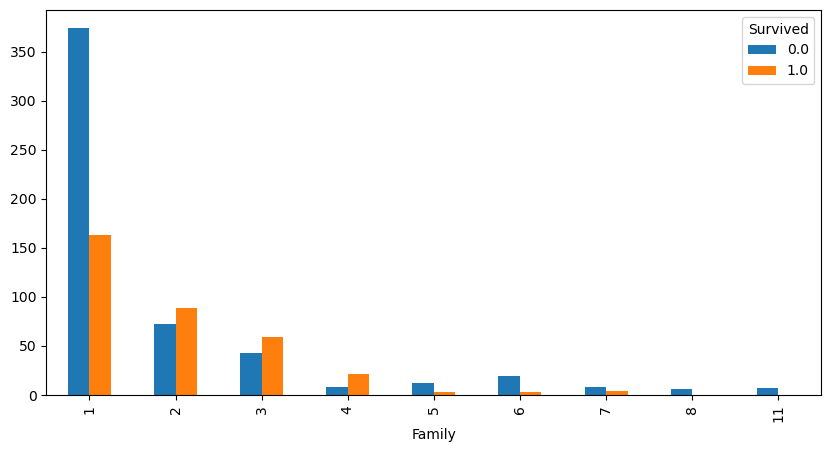

In [72]:
# family 
combined['Family'] = combined.SibSp+combined.Parch+1

# Pattern of family with survival
pd.crosstab(combined.Family,combined.Survived).plot(kind='bar')
plt.show()

In [73]:
# Family _category
def fam(x):
    if x==1:
        return('Single')
    elif x==2:
        return('Couples')
    elif x==3:
        return('Small_family')
    else:
        return('Large_family')

In [74]:
combined['Family_cat']  = combined.Family.apply(fam)

In [75]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_cat,titles,Family,Family_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not avail,Mr,2,Couples
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Avail,Mrs,2,Couples


In [76]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_cat', 'titles',
       'Family', 'Family_cat'],
      dtype='object')

In [77]:
new = combined.drop(columns=['Cabin','Name','PassengerId','SibSp','Parch','Ticket'],axis = 1)

In [78]:
# Split the data into train and test...

In [79]:
new.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_cat,titles,Family,Family_cat
0,0.0,3,male,22.0,7.2500,S,Not avail,Mr,2,Couples
1,1.0,1,female,38.0,71.2833,C,Avail,Mrs,2,Couples
2,1.0,3,female,26.0,7.9250,S,Not avail,Miss,1,Single
3,1.0,1,female,35.0,53.1000,S,Avail,Mrs,2,Couples
4,0.0,3,male,35.0,8.0500,S,Not avail,Mr,1,Single


In [80]:
# Split the data in Train and test
train.shape,test.shape

((891, 12), (418, 11))

In [81]:
new.shape

(1309, 10)

#### Train set

In [82]:
new_train = new.iloc[0:train.shape[0],]

In [83]:
new_train.shape

(891, 10)

#### test set

In [84]:
new_test = new.iloc[train.shape[0]:,]

In [85]:
new_test.shape

(418, 10)

In [86]:
# dropping the survived columns

In [87]:
new_test.drop(columns='Survived',axis=1,inplace=True)

### Statistical Test 
* Cat vs cat chisquare test

In [88]:
new_train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_cat,titles,Family,Family_cat
0,0.0,3,male,22.0,7.2500,S,Not avail,Mr,2,Couples
1,1.0,1,female,38.0,71.2833,C,Avail,Mrs,2,Couples


In [89]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Cabin_cat   891 non-null    object 
 7   titles      891 non-null    object 
 8   Family      891 non-null    int64  
 9   Family_cat  891 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 69.7+ KB


In [90]:
# Chi square test
# Ho: that the predictor is independent of target ( the predictor and target are not related)
# H1: Ho is false

cols = ['Embarked','Pclass','Sex','Cabin_cat','titles','Family_cat']

new_train.Survived = new_train.Survived.astype(int)

In [91]:
import scipy.stats as stats

In [92]:
for i in cols:
    tbl = pd.crosstab(new_train.loc[:,i],new_train.Survived)
    teststats,pvalue,df,exp_freq = stats.chi2_contingency(tbl)
    print(f'Pvalue for {i} is {np.round(pvalue,5)}')

Pvalue for Embarked is 0.0
Pvalue for Pclass is 0.0
Pvalue for Sex is 0.0
Pvalue for Cabin_cat is 0.0
Pvalue for titles is 0.0
Pvalue for Family_cat is 0.0


In [93]:
# the variables are significant with the target

In [94]:
# ttest ind for numerical values
cols = ['Age','Fare','Family']
for i in cols:
    zero = new_train.loc[new_train.Survived==0,i]
    one = new_train.loc[new_train.Survived==1, i]
    teststats, pvalue = stats.ttest_ind(zero,one)
    print(f'Pvalue for {i} is {np.round(pvalue,5)}')

Pvalue for Age is 0.0335
Pvalue for Fare is 0.0
Pvalue for Family is 0.61989


In [95]:
# p value is < 0.05 so we reject the null hypothesis

### Model Building 
* Logistic Regression
* random Forest model
* Gradient Boosting
* XGB boost
* Lightgbm

In [96]:
# pip install lightgbm

In [97]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [98]:
new_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_cat,titles,Family,Family_cat
0,0,3,male,22.0,7.2500,S,Not avail,Mr,2,Couples
1,1,1,female,38.0,71.2833,C,Avail,Mrs,2,Couples
2,1,3,female,26.0,7.9250,S,Not avail,Miss,1,Single
3,1,1,female,35.0,53.1000,S,Avail,Mrs,2,Couples
4,0,3,male,35.0,8.0500,S,Not avail,Mr,1,Single


In [99]:
x = new_train.drop(columns='Survived',axis = 1)
y = new_train.Survived

In [100]:
x.head()

,Pclass,Sex,Age,Fare,Embarked,Cabin_cat,titles,Family,Family_cat
0,3,male,22.0,7.2500,S,Not avail,Mr,2,Couples
1,1,female,38.0,71.2833,C,Avail,Mrs,2,Couples
2,3,female,26.0,7.9250,S,Not avail,Miss,1,Single
3,1,female,35.0,53.1000,S,Avail,Mrs,2,Couples
4,3,male,35.0,8.0500,S,Not avail,Mr,1,Single


In [101]:
# dummy the cat variables
x = pd.get_dummies(x,drop_first=True)
new_test = pd.get_dummies(new_test,drop_first=True)

In [102]:
x.shape,new_test.shape

((891, 16), (418, 16))

In [103]:
# Intiate the machines
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

lg  =LogisticRegression()

pred = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    
    pred.append(lg.fit(xtrain,ytrain).predict(new_test))


In [104]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)

In [105]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})

In [106]:
submission.to_csv('logistic_reg.csv',index=False)

In [107]:
# Random forest
rf = RandomForestClassifier()

pred = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    
    pred.append(rf.fit(xtrain,ytrain).predict(new_test))  # 74.641%

In [108]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)

In [109]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})

In [110]:
submission.to_csv('Random_forest.csv',index=False)

In [111]:
# Xgboost 
xg   = XGBClassifier()

pred = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    
    pred.append(xg.fit(xtrain,ytrain).predict(new_test))  # 74.162%

In [112]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)

In [113]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})

In [114]:
submission.to_csv('xgboost.csv',index=False)

In [115]:
# Adaboost
ada = AdaBoostClassifier(random_state=10)

pred = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    
    pred.append(ada.fit(xtrain,ytrain).predict(new_test)) #76.315%

In [116]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)

In [117]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})

In [118]:
submission.to_csv('adaboost.csv',index=False)

In [119]:
# Gradient boosting
gbm = GradientBoostingClassifier()

pred = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    
    pred.append(gbm.fit(xtrain,ytrain).predict(new_test)) # 77.727%

In [120]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)

In [121]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})

In [122]:
submission.to_csv('gbmboost.csv',index=False)

In [123]:
# light gbm
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

lgb = LGBMClassifier()

pred = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    
    pred.append(lgb.fit(xtrain,ytrain).predict(new_test)) # 75.358%

In [124]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)

In [125]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})

In [126]:
submission.to_csv('lgm.csv',index=False)

### parameter tuning

In [127]:
# parameter of tuning of gradient boosting

params = {'loss':['log_loss','deviance', 'exponential'],
         'n_estimators':[100,200,500],
         'min_samples_split':[2,4,6,8],
         'max_depth':[2,4,6,8]}

gbm  = GradientBoostingClassifier()

grid = GridSearchCV(estimator=gbm, param_grid=params,cv = 5)

grid.fit(x,y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 500]})

In [128]:
grid.best_params_

{'loss': 'deviance',
 'max_depth': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [133]:
pip install StackingClassifier

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement StackingClassifier (from versions: none)
ERROR: No matching distribution found for StackingClassifier


In [135]:
from sklearn.ensemble import StackingClassifier

In [139]:
### Stacking Classifier Model

basemodel = [('lg',lg),('lgb',lgb)]
finalmodel = GradientBoostingClassifier(loss='deviance',max_depth=4,min_samples_split=8,n_estimators=200)

stack  = StackingClassifier(estimators= basemodel, final_estimator = finalmodel ,cv = 5)

pred = []
for train_index, test_index in kfold.split(x,y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(stack.fit(xtrain,ytrain).predict(new_test))

In [140]:
finalpred = pd.DataFrame(pred).T.mode(axis=1)

In [141]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':finalpred[0]})

In [142]:
submission.to_csv('Stacking.csv',index=False)